In [4]:
import matplotlib.pyplot as plt

In [5]:
def ReLU(x):
    '''@returns y'''
    if x > 0:
        return x
    else:
        return 0

In [16]:
def display_ReLU(weight=1, bias=0, lower_bound=-10, upper_bound=10):
    inputs = []

    y_results = []
    for i in range(-10, 10):
        inputs.append(i)
        y_results.append(ReLU((i * weight) + bias))

    print("Inputs:", inputs)
    print("Results:", y_results)

    plt.plot(inputs, y_results)
    plt.xlabel("x (Inputs)")
    plt.ylabel("y (ReLU output)")
    plt.show()

Inputs: [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Results: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


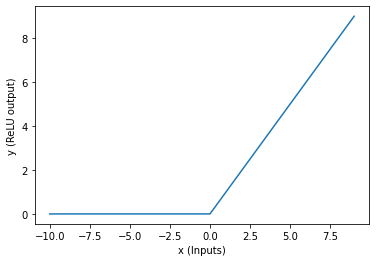

In [19]:
display_ReLU(weight=1, bias=0)

Inputs: [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Results: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


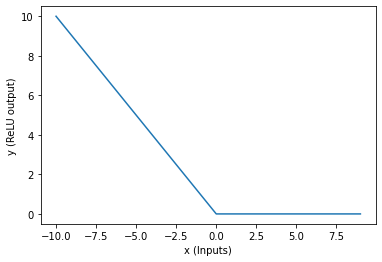

In [20]:
display_ReLU(weight=-1, bias=0)